In [1]:
import logging
from IPython.core.interactiveshell import InteractiveShell
%load_ext autoreload
InteractiveShell.ast_node_interactivity = "all"

logging.basicConfig(
    level=logging.DEBUG, format="%(asctime)s - %(name)s - %(levelname)s - %(message)s"
)

In [2]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

2024-08-06 08:35:09,629 - numexpr.utils - INFO - Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2024-08-06 08:35:09,630 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.
2024-08-06 08:35:10,520 - matplotlib - DEBUG - matplotlib data path: /cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/matplotlib/mpl-data
2024-08-06 08:35:10,531 - matplotlib - DEBUG - CONFIGDIR=/cmnfs/home/z.xiao/.config/matplotlib
2024-08-06 08:35:10,534 - matplotlib - DEBUG - interactive is False
2024-08-06 08:35:10,535 - matplotlib - DEBUG - platform is linux
2024-08-06 08:35:10,632 - matplotlib - DEBUG - CACHEDIR=/cmnfs/home/z.xiao/.cache/matplotlib
2024-08-06 08:35:10,641 - matplotlib.font_manager - DEBUG - Using fontManager instance from /cmnfs/home/z.xiao/.cache/matplotlib/fontlist-v330.json


# Load data

In [3]:
import json
import os
import pandas as pd

# experiment specific
result_parent_dir = "/cmnfs/proj/ORIGINS/data/brain/FreshFrozenBrain/SingleShot/DDA/"
result_base_dir = "frame0_1830_ssDDA_P064428_Fresh1_5ug_R1_BD5_1_4921_ScanByScan_RTtol0.9_threshold_missabthres0.5_convergence_NoIntercept_pred_mzBinDigits2_imPeakWidth4_deltaMobilityThres80"
pept_batch_size = 50000

result_dir = os.path.join(result_parent_dir, result_base_dir)
with open(os.path.join(result_dir, "param.json"), mode="r", encoding="utf-8") as file:
    config = json.load(file)

maxquant_file_exp = config["MQ_exp_path"]
maxquant_file_ref = os.path.join(result_dir, "maxquant_result_ref.pkl")
maxquant_result_dict = pd.read_pickle(filepath_or_buffer=maxquant_file_ref)
maxquant_result_merge = pd.read_pickle(
    filepath_or_buffer=os.path.join(result_dir, "maxquant_result_merged_cleaned.pkl")
)

ms1scans = pd.read_csv(os.path.join(result_dir, "ms1scans.csv"), index_col=0)
mobility_values_df = pd.read_csv(
    os.path.join(result_dir, "mobility_values.csv"), index_col=0
)

In [5]:
ms1scans["rt_coordinate"] = ms1scans["MS1_frame_idx.1"] + 1

In [6]:
maxquant_result_dict.columns

Index(['Sequence', 'Length', 'Modifications', 'Modified sequence',
       'Oxidation (M) Probabilities', 'Oxidation (M) Score Diffs',
       'Acetyl (Protein N-term)', 'Oxidation (M)', 'Missed cleavages',
       'Proteins', 'Leading proteins', 'Leading razor protein', 'Gene names',
       'Protein names', 'Type', 'Raw file', 'Fraction', 'Experiment',
       'MS/MS m/z', 'Charge', 'm/z', 'Mass',
       'Uncalibrated - Calibrated m/z [ppm]',
       'Uncalibrated - Calibrated m/z [Da]', 'Mass error [ppm]',
       'Mass error [Da]', 'Uncalibrated mass error [ppm]',
       'Uncalibrated mass error [Da]', 'Max intensity m/z 0', 'Retention time',
       'Retention length', 'Calibrated retention time',
       'Calibrated retention time start', 'Calibrated retention time finish',
       'Retention time calibration', 'Ion mobility index',
       'Ion mobility length', '1/K0', '1/K0 length', 'Calibrated 1/K0', 'CCS',
       'Calibrated CCS', 'CCS length', 'Match time difference',
       'Match m/

In [7]:
maxquant_result_dict = maxquant_result_dict.sort_values("predicted_RT")
maxquant_result_dict = pd.merge_asof(
    left=maxquant_result_dict,
    right=ms1scans[["rt_coordinate", "Time_minute"]],
    left_on="predicted_RT",
    right_on="Time_minute",
    direction="nearest",
)

In [8]:
import numpy as np

# Create an array filled with -1
array_zero = np.zeros((1831, 937))

# Set the value at each coordinate to -1
array_zero[
    maxquant_result_dict["rt_coordinate"], maxquant_result_dict["mobility_values_index"]
] = -1

array_zero

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
array_zero.min()

-1.0

In [31]:
np.save(os.path.join(result_dir, "hint_channel.npz"), array_zero)

2024-06-12 09:43:33,343 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-06-12 09:43:33,346 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-06-12 09:43:33,349 - matplotlib.font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-06-12 09:43:33,350 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996
2024-06-12 09:43:33,351 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='norm

2024-06-12 09:43:33,365 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2024-06-12 09:43:33,366 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-06-12 09:43:33,366 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2024-06-12 09:43:33,367 - matplotlib.font_manager - DE

(array([ 114.,  927., 4843., 8606., 7899., 4985., 2336., 1037.,  247.,
          35.]),
 array([3.02930259, 3.4687002 , 3.90809781, 4.34749542, 4.78689302,
        5.22629063, 5.66568824, 6.10508584, 6.54448345, 6.98388106,
        7.42327867]),
 <BarContainer object of 10 artists>)

count    3.102900e+04
mean     2.649286e+05
std      7.874116e+05
min      1.068800e+03
25%      2.851700e+04
50%      6.874900e+04
75%      1.939700e+05
max      2.650200e+07
Name: Intensity, dtype: float64

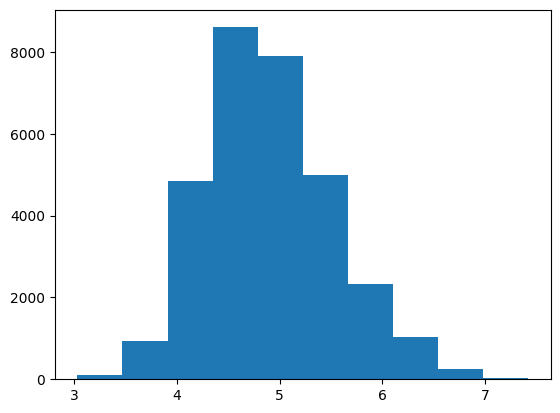

In [4]:
a = np.log10(maxquant_result_merge["Intensity"].values + 1)
plt.hist(a)
maxquant_result_merge["Intensity"].describe()

<Axes: >

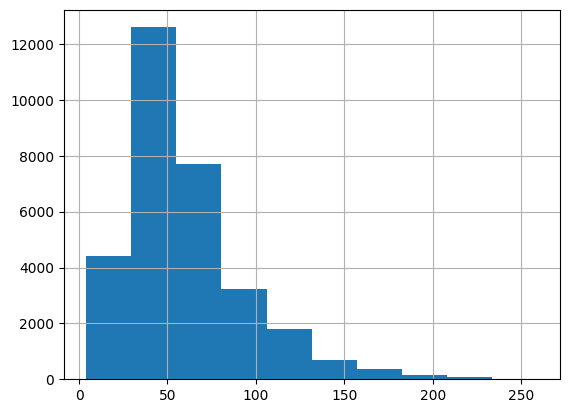

In [5]:
maxquant_result_merge["Ion mobility length"].hist()

<Axes: >

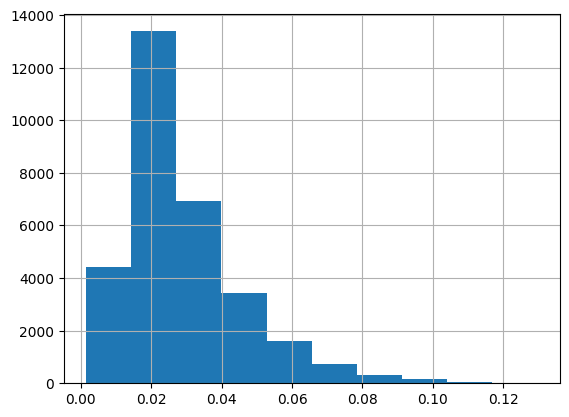

In [6]:
maxquant_result_merge["1/K0 length"].hist()

# Data preparation

In [11]:
import sparse

pept_act_batch = sparse.load_npz(
    os.path.join(result_dir, f"output_im_rt_pept_act_coo_peptbatch0.npz")
)

In [12]:
maxquant_result_dict["mz_bin_1digit"] = np.round(maxquant_result_dict["m/z"], 1)
maxquant_result_dict["mz_bin_2digit"] = np.round(maxquant_result_dict["m/z"], 2)

In [13]:
# Create an array filled with -1
array_zero = np.zeros((1831, 937))
pept_mz_rank = 47275
mz_ref = maxquant_result_dict.loc[
    maxquant_result_dict["mz_rank"] == pept_mz_rank, "mz_bin_2digit"
].values[0]
# Set the value at each coordinate to -1
array = array_zero.copy()
array[
    maxquant_result_dict.loc[
        (maxquant_result_dict["mz_bin_2digit"] == mz_ref),
        "rt_coordinate",
    ],
    maxquant_result_dict.loc[
        (maxquant_result_dict["mz_bin_2digit"] == mz_ref),
        "mobility_values_index",
    ],
    # maxquant_result_dict["mobility_values_index"]["mobility_values_index"],
] = -1

array.sum()

-33.0

2024-07-08 09:43:36,600 - h5py._conv - DEBUG - Creating converter from 7 to 5
2024-07-08 09:43:36,601 - h5py._conv - DEBUG - Creating converter from 5 to 7
2024-07-08 09:43:36,602 - h5py._conv - DEBUG - Creating converter from 7 to 5
2024-07-08 09:43:36,603 - h5py._conv - DEBUG - Creating converter from 5 to 7
/cmnfs/home/z.xiao/miniconda3/envs/sbs/lib/python3.10/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2024-07-08 09:44:15,784 - peak_detection_2d.dataset.dataset - INFO - Prepare data for peptide mz rank 47275
2024-07-08 09:44:15,786 - peak_detection_2d.dataset.dataset - DEBUG - Bbox: [3.1765, 3.4502, 0.2737000000000003, 0.90217017451533, 0.9458941471957659, 0.0437239726804359]
2024-07-08 09:44:15,787 - peak_detection_2d.dataset.dataset - DEBUG - Bbox indices: 459, 474, 103, 191
2024-07-08 09:44:15,789 - postprocessing.ims_3d - DEBUG - No reference RT range given, using dictionary entries: 2.89884788374755, (1.

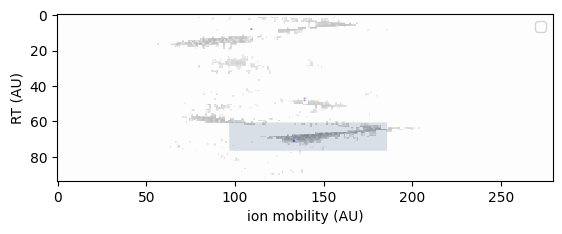

In [15]:
%autoreload 2
from peak_detection_2d.dataset.dataset import prepare_2d_act_and_mask
from peak_detection_2d.utils import plot_data_points

dp = prepare_2d_act_and_mask(
    pept_mz_rank=pept_mz_rank,
    act_3d=pept_act_batch,
    maxquant_result_merged=maxquant_result_merge,
    mobility_values_df=mobility_values_df,
    ms1scans=ms1scans,
    pept_batch_idx=0,
    pept_batch_size=50000,
    delta_im = 0.07,
    hint_channel=array_zero
)
plot_data_points(dp, log_data=True, label="mask")

In [113]:
maxquant_result_dict["mz_bin_2digit"].nunique()

45886

In [95]:
array_zero.max()

0.0

In [14]:
np.where(dp["hint_channel"] == 1)
plt.imshow(dp["hint_channel"])

NameError: name 'dp' is not defined

In [42]:
dp["hint_channel"].sum()

-5505.0

In [70]:
maxquant_result_exp = pd.read_csv(maxquant_file_exp, sep="\t", low_memory=False)

2024-06-04 10:27:25,779 - peak_detection_2d.dataset - INFO - Prepare data for peptide mz rank 9447
2024-06-04 10:27:25,780 - peak_detection_2d.dataset - DEBUG - Bbox: [11.708, 11.924, 0.2159999999999993, 0.8431889629608399, 0.865876548839508, 0.0226875858786681]
2024-06-04 10:27:25,782 - postprocessing.ims_3d - DEBUG - No reference RT range given, using dictionary entries: 11.121958276525897, (10.221958276525896, 12.021958276525897).
2024-06-04 10:27:25,784 - postprocessing.ims_3d - DEBUG - No reference IM range given, using dictionary entries: 0.8681481837889383, (0.8281481837889383, 0.9081481837889384).
2024-06-04 10:27:25,784 - peak_detection_2d.dataset - DEBUG - RT and IM range: [819, 913], [0, 117]


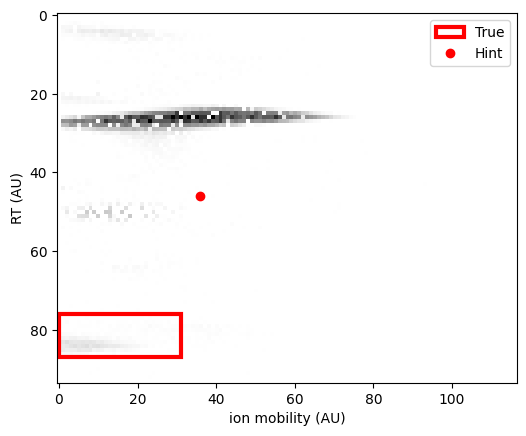

In [12]:
from peak_detection_2d.dataset import prepare_2d_act_and_bbox

maxquant_result_dict = pd.read_pickle(filepath_or_buffer=maxquant_file_ref)
maxquant_result_exp = pd.read_csv(maxquant_file_exp, sep="\t", low_memory=False)
dp_bbox = prepare_2d_act_and_bbox(
    pept_mz_rank=pept_mz_rank,
    act_3d=pept_act_batch,
    maxquant_result_exp=maxquant_result_exp,
    maxquant_result_dict=maxquant_result_dict,
    mobility_values_df=mobility_values_df,
    ms1scans=ms1scans,
    pept_batch_idx=0,
    pept_batch_size=50000,
)
plot_data_points(dp_bbox, label="bbox")

## Prepare hint matrix

In [3]:
maxquant_dict = pd.read_pickle(
    "/cmnfs/proj/ORIGINS/SWAPS_exp/tims_ramp_time/corrected_RT_tol_pred_120min_library_80ms_20240729_105248_996985/maxquant_result_ref.pkl"
)

In [ ]:
from peak_detection_2d.utils import generate_hint_sparse_matrix

hint_spr_mat = generate_hint_sparse_matrix(
    maxquant_dict_df=maxquant_dict, shape=(2963, 750, 87549)
)

In [ ]:
import sparse

sparse.save_npz(
    "/cmnfs/proj/ORIGINS/SWAPS_exp/tims_ramp_time/corrected_RT_tol_pred_120min_library_80ms_20240729_105248_996985/results/activation/hint_matrix.npz",
    hint_spr_mat,
)

# Efficiently prepare datapoints

In [23]:
from utils.config import get_cfg_defaults
from utils.singleton_swaps_optimization import swaps_optimization_cfg
import sparse

config_path = "/cmnfs/proj/ORIGINS/SWAPS_exp/tims_ramp_time/corrected_RT_tol_pred_120min_library_80ms_with_decoy_pred_20240806_090347_182738/config_20240806_090347_182738.yaml"
cfg = get_cfg_defaults(swaps_optimization_cfg)
cfg.merge_from_file(config_path)
maxquant_result_ref = pd.read_pickle(cfg.DICT_PICKLE_PATH)

# mobility_values_df = pd.read_csv(os.path.join(cfg.RESULT_PATH, "mobility_values.csv"))
# ms1scans = pd.read_csv(os.path.join(cfg.RESULT_PATH, "ms1scans.csv"))

In [5]:
act_3d = sparse.load_npz(
    os.path.join(
        cfg.RESULT_PATH, "results", "activation", "im_rt_pept_act_coo_peptbatch0.npz"
    )
)
# hint_matrix = sparse.load_npz(
#     os.path.join(cfg.RESULT_PATH, "results", "activation", "hint_matrix.npz")
# )

## Prepare full dictionary

### prepare exp results

In [5]:
# relevant columns in exp
exp_cols = [
    "Sequence",
    "Modified sequence",
    "Charge",
    "Intensity",
    "Type",
    "Raw file",
    "Calibrated retention time",
    "Retention length",
    "Calibrated retention time start",
    "Calibrated retention time finish",
    "Ion mobility length",
    "1/K0",
    "1/K0 length",
    "Calibrated 1/K0",
]

In [14]:
maxquant_result_exp = pd.read_csv(
    cfg.RESULT_ANALYSIS.MQ_EXP_PATH, sep="\t", low_memory=False
)
maxquant_result_exp = maxquant_result_exp.loc[
    maxquant_result_exp["Raw file"] == cfg.PREPARE_DICT.FILTER_TRAIN_BY_RAW_FILE,
    exp_cols,
]

In [15]:
%autoreload 2
from prepare_dict.prepare_dict import dict_add_rt_index
maxquant_result_exp.columns
maxquant_result_exp = dict_add_rt_index(
    maxquant_result_exp,
    ms1scans,
    "Calibrated retention time start",
    "Calibrated retention time",
    "Calibrated retention time finish",
)
maxquant_result_exp.columns

Index(['Sequence', 'Modified sequence', 'Charge', 'Intensity', 'Type',
       'Raw file', 'Calibrated retention time', 'Retention length',
       'Calibrated retention time start', 'Calibrated retention time finish',
       'Ion mobility length', '1/K0', '1/K0 length', 'Calibrated 1/K0'],
      dtype='object')

Index(['Sequence', 'Modified sequence', 'Charge', 'Intensity', 'Type',
       'Raw file', 'Calibrated retention time', 'Retention length',
       'Calibrated retention time start', 'Calibrated retention time finish',
       'Ion mobility length', '1/K0', '1/K0 length', 'Calibrated 1/K0',
       'Time_minute', 'MS1_frame_idx', 'Time_minute_left',
       'MS1_frame_idx_left', 'Time_minute_right', 'MS1_frame_idx_right'],
      dtype='object')

In [16]:
%autoreload 2
from prepare_dict.prepare_dict import dict_add_im_index
maxquant_result_exp = dict_add_im_index(maxquant_result_exp, mobility_values_df, "1/K0")
maxquant_result_exp.columns

Index(['Sequence', 'Modified sequence', 'Charge', 'Intensity', 'Type',
       'Raw file', 'Calibrated retention time', 'Retention length',
       'Calibrated retention time start', 'Calibrated retention time finish',
       'Ion mobility length', '1/K0', '1/K0 length', 'Calibrated 1/K0',
       'Time_minute', 'MS1_frame_idx', 'Time_minute_left',
       'MS1_frame_idx_left', 'Time_minute_right', 'MS1_frame_idx_right',
       'mobility_values_index', 'mobility_values',
       'mobility_values_index_left', 'mobility_values_left',
       'mobility_values_index_right', 'mobility_values_index_length'],
      dtype='object')

In [1]:
%autoreload
from prepare_dict.prepare_dict import dict_add_rt_index

maxquant_dict_tmp = maxquant_result_ref.drop(
    labels=ms1scans.columns[ms1scans.columns.isin(maxquant_result_ref.columns)], axis=1
) # drop ms1scans columns to avoid conflicts
maxquant_dict_tmp = dict_add_rt_index(maxquant_dict_tmp, ms1scans)

UsageError: Line magic function `%autoreload` not found.


In [33]:
%autoreload
from prepare_dict.prepare_dict import dict_add_im_index

maxquant_dict_tmp = maxquant_dict_tmp.drop(
    labels=mobility_values_df.columns[mobility_values_df.columns.isin(maxquant_result_ref.columns)], axis=1
)# drop mobility_values columns to avoid conflicts
maxquant_dict_tmp = dict_add_im_index(maxquant_dict_tmp, mobility_values_df)

2024-08-01 10:35:12,939 - prepare_dict.prepare_dict - INFO - IM range: 351


In [48]:
# get cropping range for preparing data
## RT
rt_left_range = int(maxquant_dict_tmp["RT_left_index_length"].quantile(0.9999)) + 1
rt_right_range = int(maxquant_dict_tmp["RT_right_index_length"].quantile(0.9999)) + 1
im_left_range = int(maxquant_dict_tmp["Ion mobility length"].quantile(0.999) + 2) // 2

In [38]:
from prepare_dict.prepare_dict import merge_ref_and_exp

"mz_bin" in maxquant_dict_tmp.columns
maxquant_dict = merge_ref_and_exp(
    maxquant_ref_df=maxquant_dict_tmp,
    maxquant_exp_df=maxquant_result_exp,
    save_dir="/cmnfs/proj/ORIGINS/SWAPS_exp/tims_ramp_time/corrected_RT_tol_pred_120min_library_80ms_20240729_105248_996985/RT_tranfer_learn/",
)
"mz_bin" in maxquant_dict.columns

True

2024-08-01 10:37:03,589 - utils.tools - INFO - Removing 109 decoys from file, 87439 entries left.
2024-08-01 10:37:03,703 - utils.tools - INFO - Removing 27 decoys from file, 35008 entries left.
2024-08-01 10:37:03,775 - utils.tools - INFO - Removing 431 duplicate entries from experiment file, 34577 entries left.


True

In [40]:
maxquant_dict = maxquant_dict.loc[maxquant_dict["_merge"] != "right_only"]

In [45]:
maxquant_dict[
    [
        "MS1_frame_idx",
        "MS1_frame_idx_left",
        "MS1_frame_idx_right",
        "mobility_values_index",
        "mobility_values_index_left",
        "mobility_values_index_right",
        "mz_rank",
    ]
] = maxquant_dict[
    [
        "MS1_frame_idx",
        "MS1_frame_idx_left",
        "MS1_frame_idx_right",
        "mobility_values_index",
        "mobility_values_index_left",
        "mobility_values_index_right",
        "mz_rank",
    ]
].astype(
    int
)
maxquant_dict[
    [
        "MS1_frame_idx",
        "MS1_frame_idx_left",
        "MS1_frame_idx_right",
        "mobility_values_index",
        "mobility_values_index_left",
        "mobility_values_index_right",
        "mz_rank",
    ]
].dtypes
"mz_bin" in maxquant_dict.columns

MS1_frame_idx                  int64
MS1_frame_idx_left             int64
MS1_frame_idx_right            int64
mobility_values_index          int64
mobility_values_index_left     int64
mobility_values_index_right    int64
mz_rank                        int64
dtype: object

True

In [49]:
"Ion mobility length_exp" in maxquant_dict.columns

True

In [46]:
maxquant_dict.to_pickle(
    os.path.join(cfg.RESULT_PATH, "maxquant_result_merged_cleaned_no_exp_only.pkl")
)

## Prepare training hdf5 files

In [26]:
maxquant_row = maxquant_result_ref.loc[maxquant_result_ref["mz_rank"] == 47275]
int(maxquant_row["MS1_frame_idx_left_ref"].values[0])

1539

In [29]:
maxquant_dict_for_training = maxquant_result_ref.loc[
    (maxquant_result_ref["source"] == "exp") & ~(maxquant_result_ref["Decoy"])
]

In [18]:
# generate hint matrix
%autoreload 2
from peak_detection_2d.prepare_dataset import generate_hint_sparse_matrix

hint_matrix = generate_hint_sparse_matrix(
    maxquant_dict_df=maxquant_result_ref, shape=act_3d.shape
)

In [91]:
pept_batch_size = act_3d.shape[2] // 2
maxquant_dict["pept_batch_idx"] = (maxquant_dict["mz_rank"] // pept_batch_size).astype(
    int
)
max_pept_batch_idx = maxquant_dict["pept_batch_idx"].max()
maxquant_dict.loc[
    maxquant_dict["pept_batch_idx"] == max_pept_batch_idx, "pept_batch_idx"
] = (max_pept_batch_idx - 1)
pept_batch_indicies = maxquant_dict["pept_batch_idx"].unique()

In [93]:
%autoreload 2
from peak_detection_2d.dataset.dataset import process_pept_mz_ranks, create_hdf5_file_with_placeholders
from peak_detection_2d.utils import save_data_points_to_hdf5
# Create the HDF5 file with placeholders
pept_mz_ranks = maxquant_dict["mz_rank"].values[0:2000]
hdf5_file_path = os.path.join(cfg.RESULT_PATH, 'results', 'activation', "datapoints.hdf5")
create_hdf5_file_with_placeholders(hdf5_file_path, pept_mz_ranks)

# Process and write data to the HDF5 file
list_of_data_points = process_pept_mz_ranks(
                            pept_mz_ranks=pept_mz_ranks,
                            peptbatch_act=act_3d,
                            maxquant_dict=maxquant_dict,
                            hint_matrix=hint_matrix,
                                    rt_range=[rt_left_range, rt_right_range],
                                    im_range=[im_left_range, im_left_range],
                            hdf5_file_path=hdf5_file_path,
                            num_workers=4  # Adjust based on your system's capabilities
                        )
save_data_points_to_hdf5(list_of_data_points, hdf5_file_path)

2024-08-01 15:01:23,162 - peak_detection_2d.dataset.dataset - DEBUG - Created HDF5 file with placeholders.


NameError: name 'hint_matrix' is not defined

## Test Dataset

In [70]:
%autoreload 2
import torch
from torchvision.transforms import Compose
from peak_detection_2d.dataset.dataset import  MultiHDF5_MaskDataset, Mask_Padding, Mask_AddHintChannel,Mask_AddLogChannel, Mask_LogTransform
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
num_epoch = 100
patience = 10
batch_size = 64

random_state = 42


hdf5_files = [
    os.path.join(os.path.join(cfg.RESULT_PATH, "peak_selection", "training_data"), file)
    for file in os.listdir(os.path.join(cfg.RESULT_PATH, "peak_selection", "training_data"))
    if file.endswith(".hdf5")
]

# Define transformations (if any)
transformation = Compose([Mask_Padding((182, 350)), Mask_AddLogChannel(), Mask_AddHintChannel()])

# Create the dataset
dataset = MultiHDF5_MaskDataset(hdf5_files=hdf5_files[:1], use_hint_channel=True, transforms=transformation)

# Split the dataset into training and testing sets
train_val_dataset, test_dataset = dataset.split_dataset(
    train_ratio=0.9, seed=random_state
)
train_dataset, val_dataset = train_val_dataset.split_dataset(
    train_ratio=0.9, seed=random_state
)

# Example usage
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=False
)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=128, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=128, shuffle=False
)


In [103]:
%autoreload 2
from peak_detection_2d.dataset.dataset import PeptActPeakSelection_Infer_Dataset
batch0_index = maxquant_dict.loc[maxquant_dict['pept_batch_idx'] == 0, 'mz_rank'].values
infer_dataset = PeptActPeakSelection_Infer_Dataset(pept_act_coo_peptbatch=act_3d, 
                                                 maxquant_dict=maxquant_dict, 
                                                 hint_matrix=hint_matrix, 
                                                 rt_range=[rt_left_range, rt_right_range], 
                                                 im_range=[im_left_range, im_left_range], 
                                                 use_hint_channel=True,
                                                 data_index = batch0_index, 
                                                 transforms=transformation)

2024-08-01 15:10:00,562 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-08-01 15:10:00,617 - peak_detection_2d.dataset.dataset - DEBUG - image new shape torch.Size([1, 182, 350])
2024-08-01 15:10:00,619 - peak_detection_2d.dataset.dataset - DEBUG - Crop hint torch.Size([1, 182, 350])


tensor(0, device='cuda:0')

2024-08-01 15:10:00,634 - matplotlib.legend - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


8999

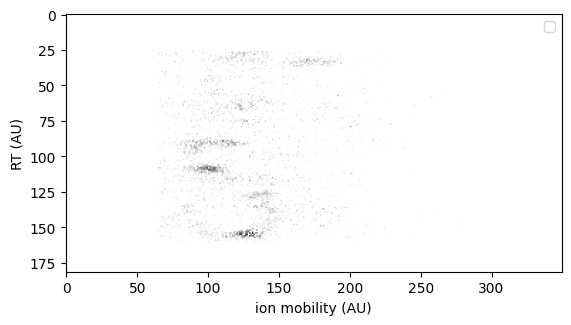

In [113]:
%matplotlib inline
from peak_detection_2d.utils import plot_data_points

image, hint, label = infer_dataset[8999]
hint.sum()
to_plot = {
    "data": image[0].cpu(),
    #"hint_idx": hint.cpu(),
    "mask": label["mask"][0].cpu(),
    "hint_channel": image[2].cpu(),
}
plot_data_points(to_plot, zoom_in=False, label="hide")
label["pept_mz_rank"]